# EDA (Análisis Exploratorio de Datos)

Nota: es importante realizar loa procesos de ETL en la carpeta ./ETL/ y el de Feature Engineering en la carpeta ./Feature Engineering/ para realizar este paso.

## Importar Librerías

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import sys
from sklearn.feature_extraction.text import CountVectorizer

# Ignorar advertencias
warnings.filterwarnings('ignore')

### importar funciones personalizadas de ../functions/EDA.py

In [114]:
# Obtener el directorio de trabajo actual
current_dir = os.getcwd()

# Navegar hacia el directorio raíz del proyecto
project_root = os.path.abspath(os.path.join(current_dir, '..'))

# Agregar la ruta del proyecto al sys.path
sys.path.append(project_root)

In [115]:
# importar función personalizada de ./VideoGameRecommender/functions/EDA.py
# Esta función permite traer el archivo en el formato que se encuentre (CSV o Parquet)
from functions.EDA import get_file, get_frequency

## EDA - steam_games (Análisis individual)

Se realiza el Análisis Exploratorio de Datos en steam_games.

### Revisión general

In [116]:
# se importa el archivo procesado con la función get_file(name_file) importada al inicio y se muestran las primeras 3 filas
steam_games = get_file('steam_games')
steam_games.head(3)

,id,app_name,genres,specs,price,developer,release_year
0,761140,Lost Summoner Kitty,casual,single-player,4.99,kotoshiro,2018.0
1,761140,Lost Summoner Kitty,action,single-player,4.99,kotoshiro,2018.0
2,761140,Lost Summoner Kitty,indie,single-player,4.99,kotoshiro,2018.0


In [117]:
# se verifican valores nulos y tipos de dato
steam_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212451 entries, 0 to 212450
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            212451 non-null  int64  
 1   app_name      212451 non-null  object 
 2   genres        211968 non-null  object 
 3   specs         205760 non-null  object 
 4   price         206716 non-null  float64
 5   developer     212451 non-null  object 
 6   release_year  198495 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 11.3+ MB


In [118]:
# obtenemos solo una copia de cada juego filtrando por unicos ids
uniques = steam_games.drop_duplicates(subset='id')
uniques.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32131 entries, 0 to 212447
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            32131 non-null  int64  
 1   app_name      32131 non-null  object 
 2   genres        31671 non-null  object 
 3   specs         29816 non-null  object 
 4   price         30950 non-null  float64
 5   developer     32131 non-null  object 
 6   release_year  29780 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 2.0+ MB


In [119]:
uniques.isna().sum()

id                 0
app_name           0
genres           460
specs           2315
price           1181
developer          0
release_year    2351
dtype: int64

### Columna Géneros

In [120]:
# crear DF con valores únicos de juegos y géneros
games_genre = steam_games[['id', 'genres']]
games_genre.drop_duplicates(inplace=True)

# eliminar valores nulos
games_genre.dropna(inplace=True)

games_genre.tail()

,id,genres
212445,658870,indie
212447,681550,action
212448,681550,indie
212449,681550,simulation
212450,681550,adventure


In [121]:
# contamos el total de juegos
total_games = len(uniques)
# contamos el total de géneros nulos
empty_genres = uniques['genres'].isna().sum()
# obtenemos el porcentaje de nulos
print(f'Total de juegos: {total_games}')
print(f'Géneros nulos: {empty_genres}')
print(f'Porcentaje de valores nulos en la columna genres: {empty_genres / total_games * 100:.2f}%')

Total de juegos: 32131
Géneros nulos: 460
Porcentaje de valores nulos en la columna genres: 1.43%


#### Visualizar géneros más comunes

In [122]:
# se utiliza la función get_frequency(df, elem, control) del archivo ../functions/EDA.py 
# sirve aislar el contenido y visualizar porcentaje de frecuencia
genres = get_frequency(steam_games, 'genres')
top_genres = genres.head(15)
top_genres

,genres,frequency,percentage
0,indie,25928,12.232035
1,action,21276,10.037364
2,strategy,17012,8.025740
3,adventure,13632,6.431159
4,casual,13232,6.242452
5,co-op,12609,5.948539
6,simulation,12073,5.695671
7,role-playing,9582,4.520494
8,real-time,4608,2.173913
9,online,4169,1.966806


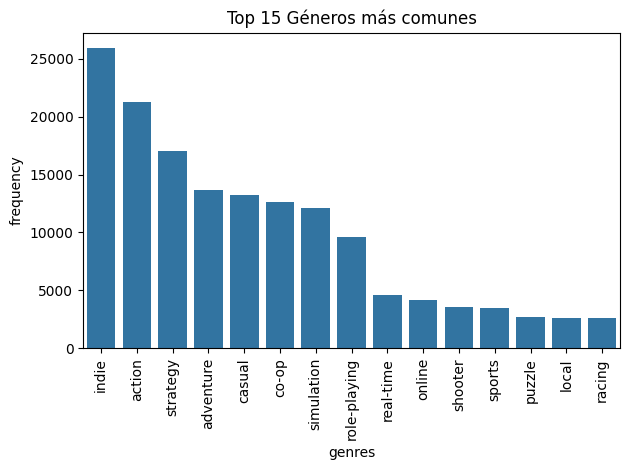

In [123]:
# visualizar los géneros más comunes
sns.barplot(x='genres', y='frequency', data=top_genres[['genres', 'frequency']])
plt.title('Top 15 Géneros más comunes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Columna Specs

#### análisis general de specs

In [124]:
# se utiliza la función get_frequency(df, elem, control) del archivo ./functios/EDA.py
game_modes = get_frequency(steam_games, 'specs')
game_modes

,specs,frequency,percentage
0,single-player,126651,61.552780
1,multi-player,42889,20.844187
2,cross-platform multiplayer,14551,7.071831
3,online multi-player,14270,6.935264
4,local multi-player,7399,3.595937


In [125]:
# contamos el total de specs nulos
empty_specs = uniques['specs'].isna().sum()
# obtenemos el porcentaje de nulos
print(f'Total de juegos: {total_games}')
print(f'Specs nulos: {empty_specs}')
print(f'Porcentaje de valores nulos en la columna specs: {empty_specs / total_games * 100:.2f}%')

Total de juegos: 32131
Specs nulos: 2315
Porcentaje de valores nulos en la columna specs: 7.20%


#### Visualizar modalidades de juego más comunes

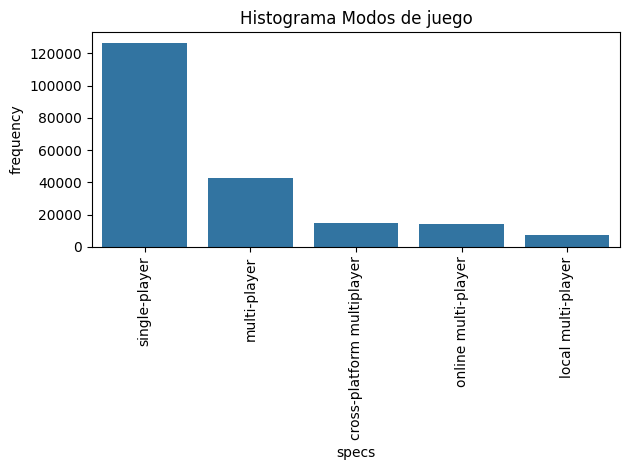

In [126]:
# visualizar los specs más comunes
sns.barplot(x='specs', y='frequency', data=game_modes[['specs', 'frequency']])
plt.title('Histograma Modos de juego')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

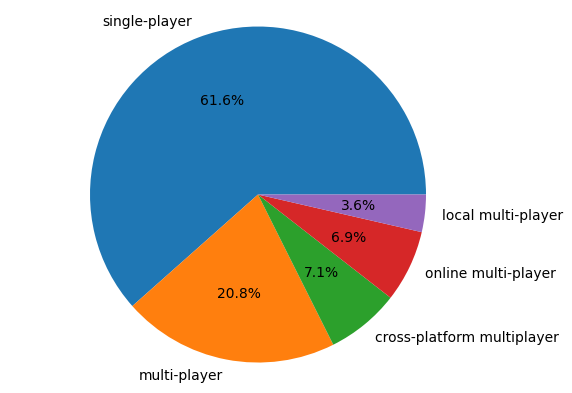

In [127]:
# realizamos un gráfico de tortas para visualizar los porcentajes de cada modo de juego
labels = game_modes['specs'].tolist()
sizes = game_modes['frequency'].tolist()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis("equal")
plt.show()

### Columna price

#### Análisis general de price

In [128]:
# contamos el total de prices nulos
empty_prices = uniques['price'].isna().sum()
# obtenemos el porcentaje de nulos
print(f'Total de juegos: {total_games}')
print(f'Precios nulos: {empty_prices}')
print(f'Porcentaje de valores nulos en la columna price: {empty_prices / total_games * 100:.2f}%')

Total de juegos: 32131
Precios nulos: 1181
Porcentaje de valores nulos en la columna price: 3.68%


In [129]:
# se utiliza la función get_frequency(df, elem, control) del archivo ./functios/EDA.py
prices = get_frequency(uniques, 'price')
prices.head(10)

,price,frequency,percentage
0,4.99,4278,13.822294
1,9.99,3902,12.607431
2,2.99,3429,11.079160
3,0.99,2607,8.423263
4,1.99,2541,8.210016
5,0.00,2105,6.801292
6,3.99,1918,6.197092
7,19.99,1717,5.547658
8,14.99,1557,5.030695
9,6.99,1199,3.873990


#### Visualización de price

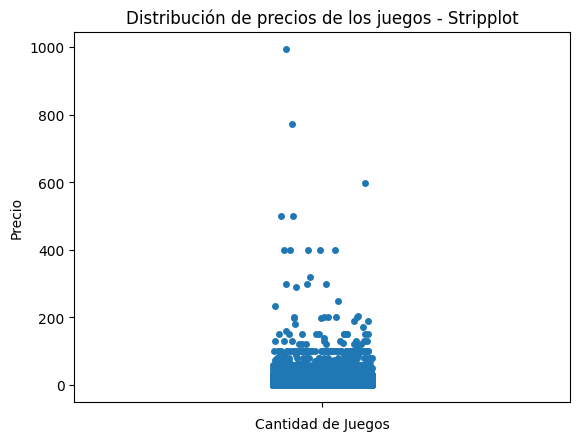

In [130]:
# se grafica para ver la distribución de precios
fig, ax = plt.subplots()

# gráfico de puntos para ver la distribución de precios de los juegos
sns.stripplot(y='price', data=uniques, ax=ax)
ax.set_ylabel('Precio')
ax.set_xlabel('Cantidad de Juegos')
ax.set_title('Distribución de precios de los juegos - Stripplot')

plt.show()

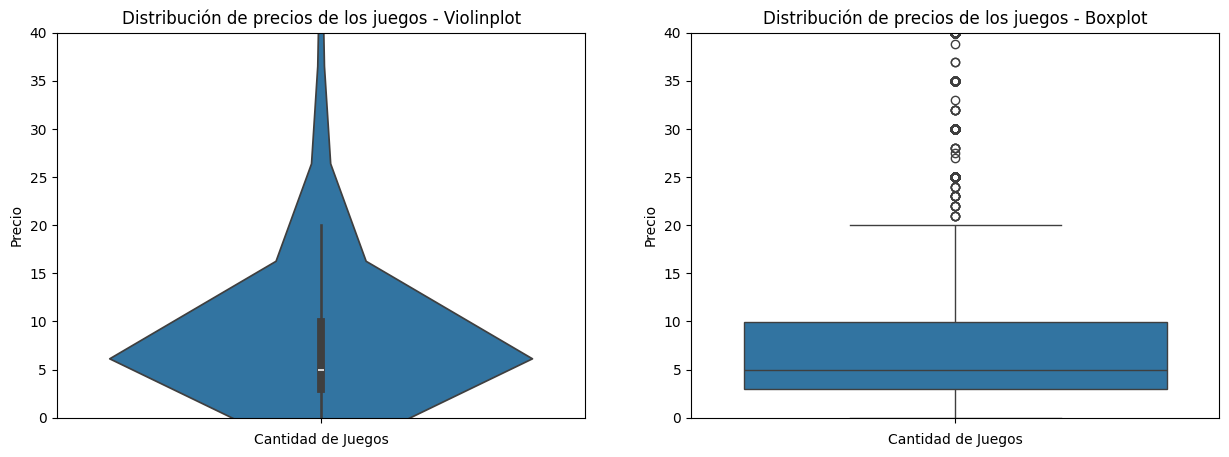

In [131]:
# se definen subplots para comparar entre gráficas de puntos, violin y cajas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# gráfico de violín para ver la distribución de precios de los juegos
sns.violinplot(y='price', data=uniques, ax=ax1)
ax1.set_ylabel('Precio')
ax1.set_xlabel('Cantidad de Juegos')
ax1.set_title('Distribución de precios de los juegos - Violinplot')

ax1.set_ylim(0, 40)

# gráfico de cajas para ver la distribución de precios de los juegos

sns.boxplot(y='price', data=uniques, ax=ax2)
ax2.set_ylabel('Precio')
ax2.set_xlabel('Cantidad de Juegos')
ax2.set_title('Distribución de precios de los juegos - Boxplot')

ax2.set_ylim(0, 40)

plt.show()

### Columna developer

#### Análisis general de developers

In [132]:
# se utiliza la función get_frequency(df, elem, control) del archivo ./functios/EDA.py
developers = get_frequency(steam_games[steam_games['developer'] != 'none'], 'developer') #el primero son los nulos
developers.head(10)

,developer,frequency,percentage
0,smiteworks,9408,4.741720
1,ubisoft,3541,1.784697
2,feral,1575,0.793815
3,paradox,1068,0.538282
4,ronimo,1008,0.508041
5,fishingplanet,846,0.426392
6,milestone,829,0.417824
7,capcom,760,0.383047
8,dovetail,702,0.353815
9,bohemia,646,0.325590


In [133]:
# contamos el total de developers nulos
empty_developers = len(uniques[uniques['developer'].values == 'none'])

# obtenemos el porcentaje de nulos
print(f'Total de juegos: {total_games}')
print(f'Developers nulos: {empty_developers}')
print(f'Porcentaje de valores nulos en la columna developer: {empty_developers / total_games * 100:.2f}%')

Total de juegos: 32131
Developers nulos: 3232
Porcentaje de valores nulos en la columna developer: 10.06%


In [134]:
devs = pd.DataFrame(developers['developer'].apply(lambda devs: devs.lower())).drop_duplicates()
print(len(devs))
devs.tail(3)
devs.to_csv('./devs.csv',index=False)

10935


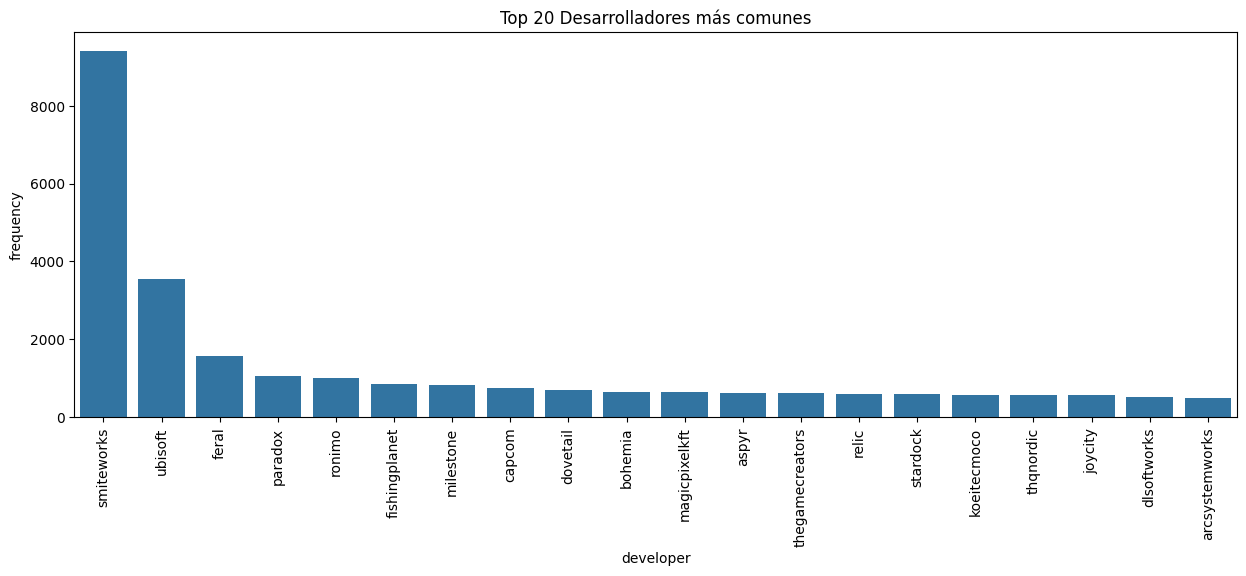

In [135]:
# graficar los 20 desarrolladores más frecuentes
fig, ax = plt.subplots(figsize=(15, 5))

sns.barplot(x='developer', y='frequency', data=developers.head(20), ax=ax)
plt.title('Top 20 Desarrolladores más comunes')
plt.xticks(rotation=90)
plt.show()

### Columna release_year

#### Análisis general de release_year

In [136]:
# contamos el total de years nulos
empty_years = uniques['release_year'].isna().sum()
# obtenemos el porcentaje de nulos
print(f'Total de juegos: {total_games}')
print(f'Años nulos: {empty_years}')
print(f'Porcentaje de valores nulos en la columna price: {empty_years / total_games * 100:.2f}%')

Total de juegos: 32131
Años nulos: 2351
Porcentaje de valores nulos en la columna price: 7.32%


In [137]:
# se utiliza la función get_frequency(df, elem, control) del archivo ./functios/EDA.py
prices = get_frequency(uniques, 'release_year')
prices.head(10)

,release_year,frequency,percentage
0,2017.0,9517,31.957690
1,2016.0,6933,23.280725
2,2015.0,4945,16.605104
3,2014.0,2831,9.506380
4,2013.0,1551,5.208193
5,2012.0,1191,3.999328
6,2011.0,589,1.977837
7,2010.0,436,1.464070
8,2009.0,337,1.131632
9,2008.0,213,0.715245


#### visualización

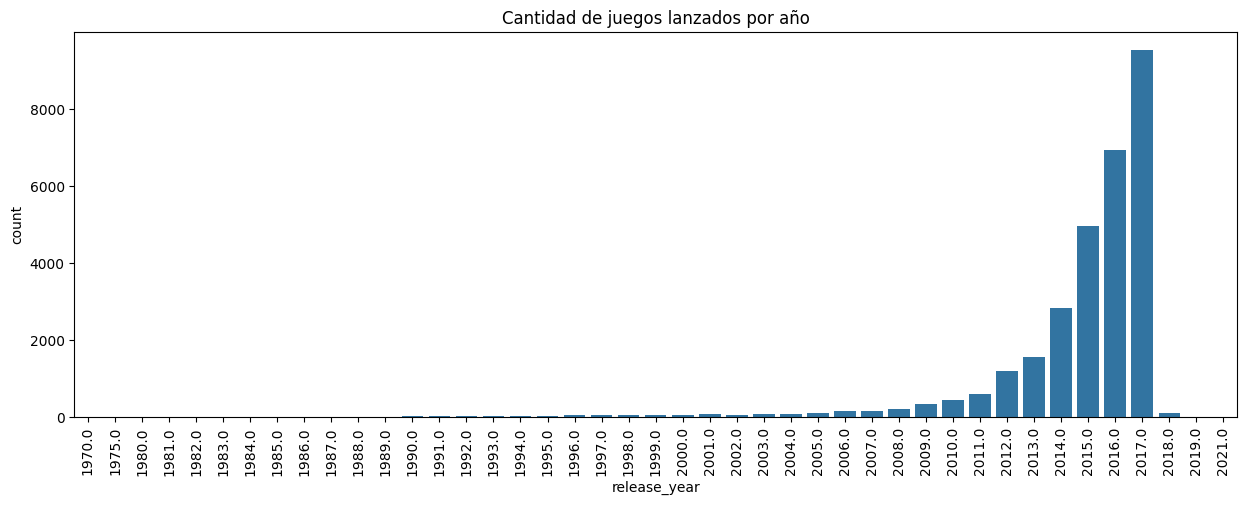

In [138]:
# graficar cantidad de juegos lanzados por año
fig, ax = plt.subplots(figsize=(15, 5))

sns.countplot(x='release_year', data=uniques, ax=ax)
plt.title('Cantidad de juegos lanzados por año')
plt.xticks(rotation=90)

plt.show()

## Relaciones

### Precios vs Géneros más comunes

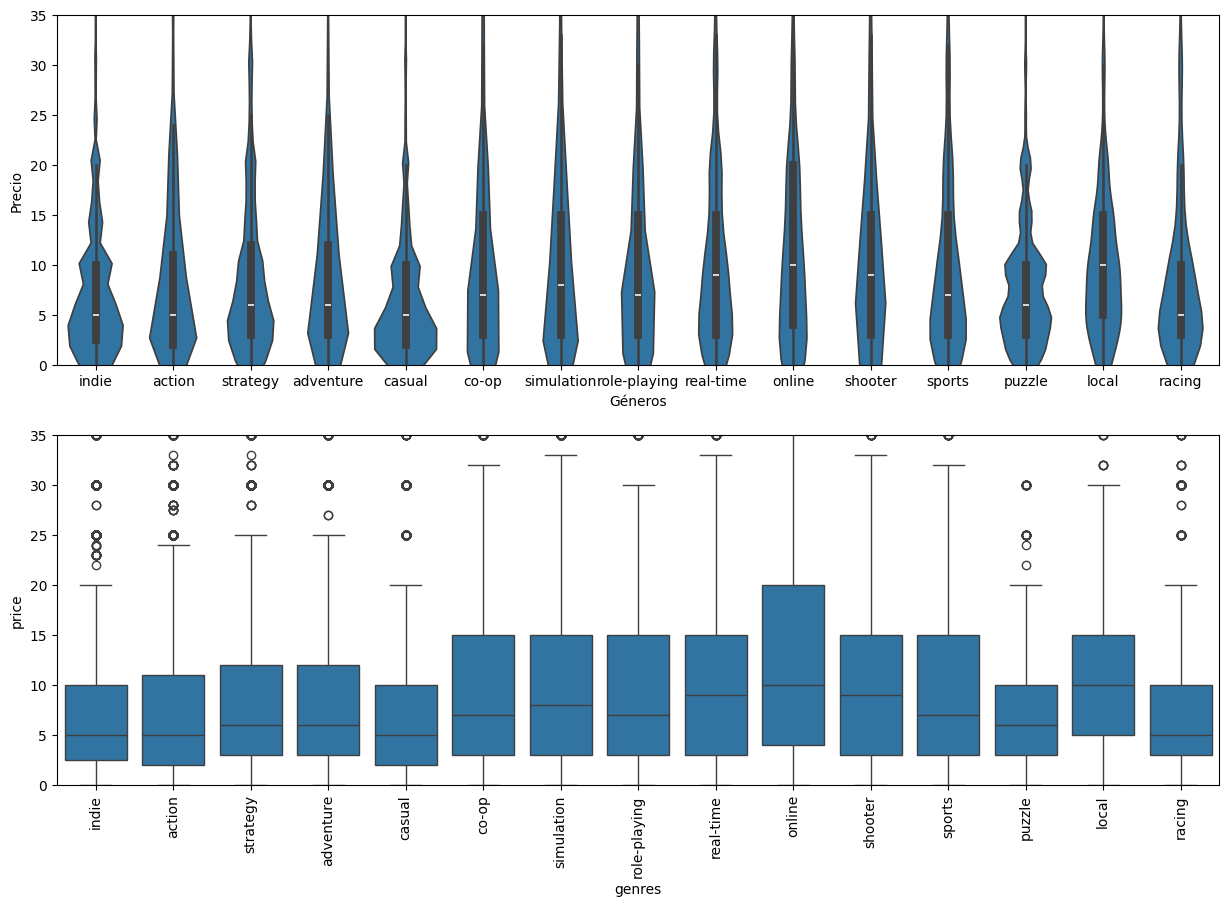

In [139]:
# realizar gráfica de violín y de cajas, para mostrar la frecuencia de los precios según los 15 géneros más comunes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

sns.violinplot(x='genres', y='price', data=steam_games, order=top_genres['genres'], ax=ax1)

ax1.set_ylabel('Precio')
ax1.set_xlabel('Géneros')

ax1.set_ylim(0, 35)

sns.boxplot(x='genres', y='price', data=steam_games, order=top_genres['genres'], ax=ax2)
plt.xticks(rotation=90)

ax2.set_ylim(0, 35)

plt.show()

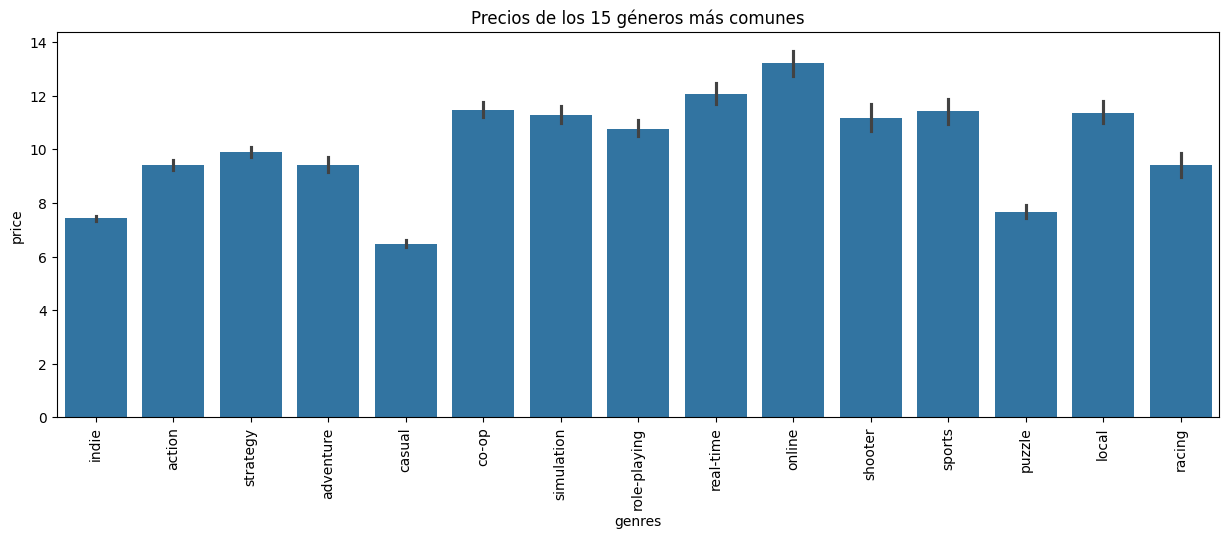

In [140]:
# graficar precios de géneros más comunes
fig, ax = plt.subplots(figsize=(15, 5))

sns.barplot(x='genres', y='price', data=steam_games, order=top_genres['genres'], ax=ax)
plt.title('Precios de los 15 géneros más comunes')
plt.xticks(rotation=90)

plt.show()

### Géneros desarrollados por desarrolladores más comunes

In [141]:
# crear el df top_devs_genres con el top de desarrolladores y la cantidad de juegos de cada género en el que hayan desarrollado
top_devs_genres = steam_games.groupby(['developer', 'genres']).size().reset_index(name='count').sort_values(by='count', ascending=False).groupby('developer').head(5).reset_index(drop=True)
top_devs_genres = top_devs_genres[(top_devs_genres['developer'] != 'none') & (top_devs_genres['developer'].isin(developers['developer'].head(10)))]

top_devs_genres.head(3)

,developer,genres,count
1,smiteworks,role-playing,1627
2,smiteworks,co-op,1625
3,smiteworks,indie,1620


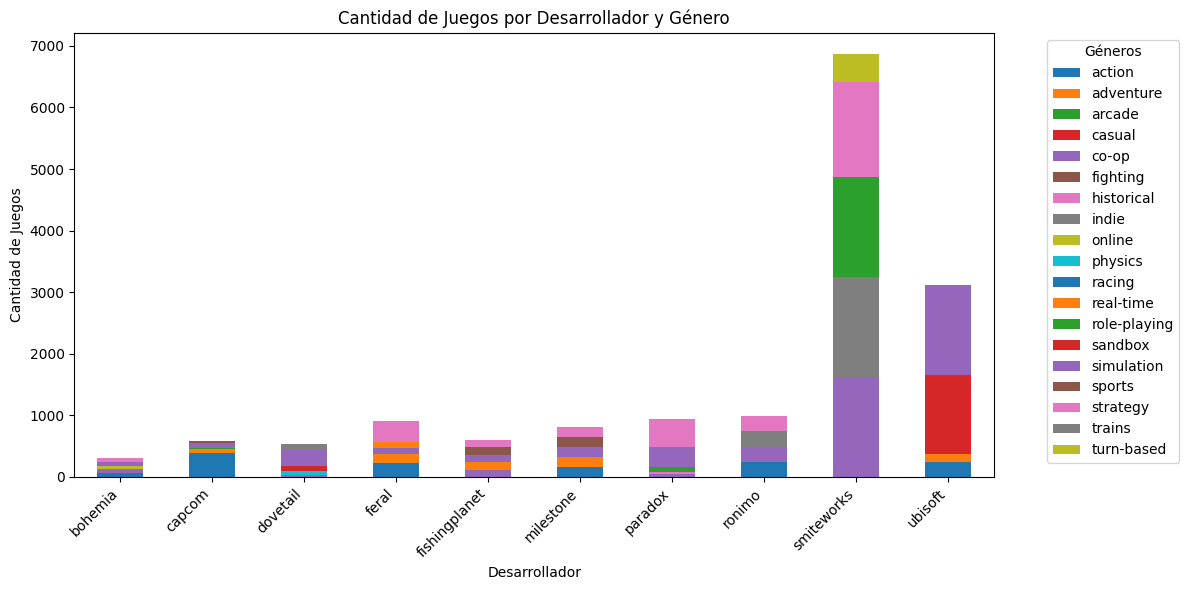

In [142]:
# graficar los generos de juegos más desarrollados por los desarrolladores más comunes
# Crear gráfico de barras apiladas
top_devs_genres_pivot = top_devs_genres.pivot(index='developer', columns='genres', values='count').fillna(0)
top_devs_genres_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Cantidad de Juegos por Desarrollador y Género')
plt.ylabel('Cantidad de Juegos')
plt.xlabel('Desarrollador')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Géneros', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

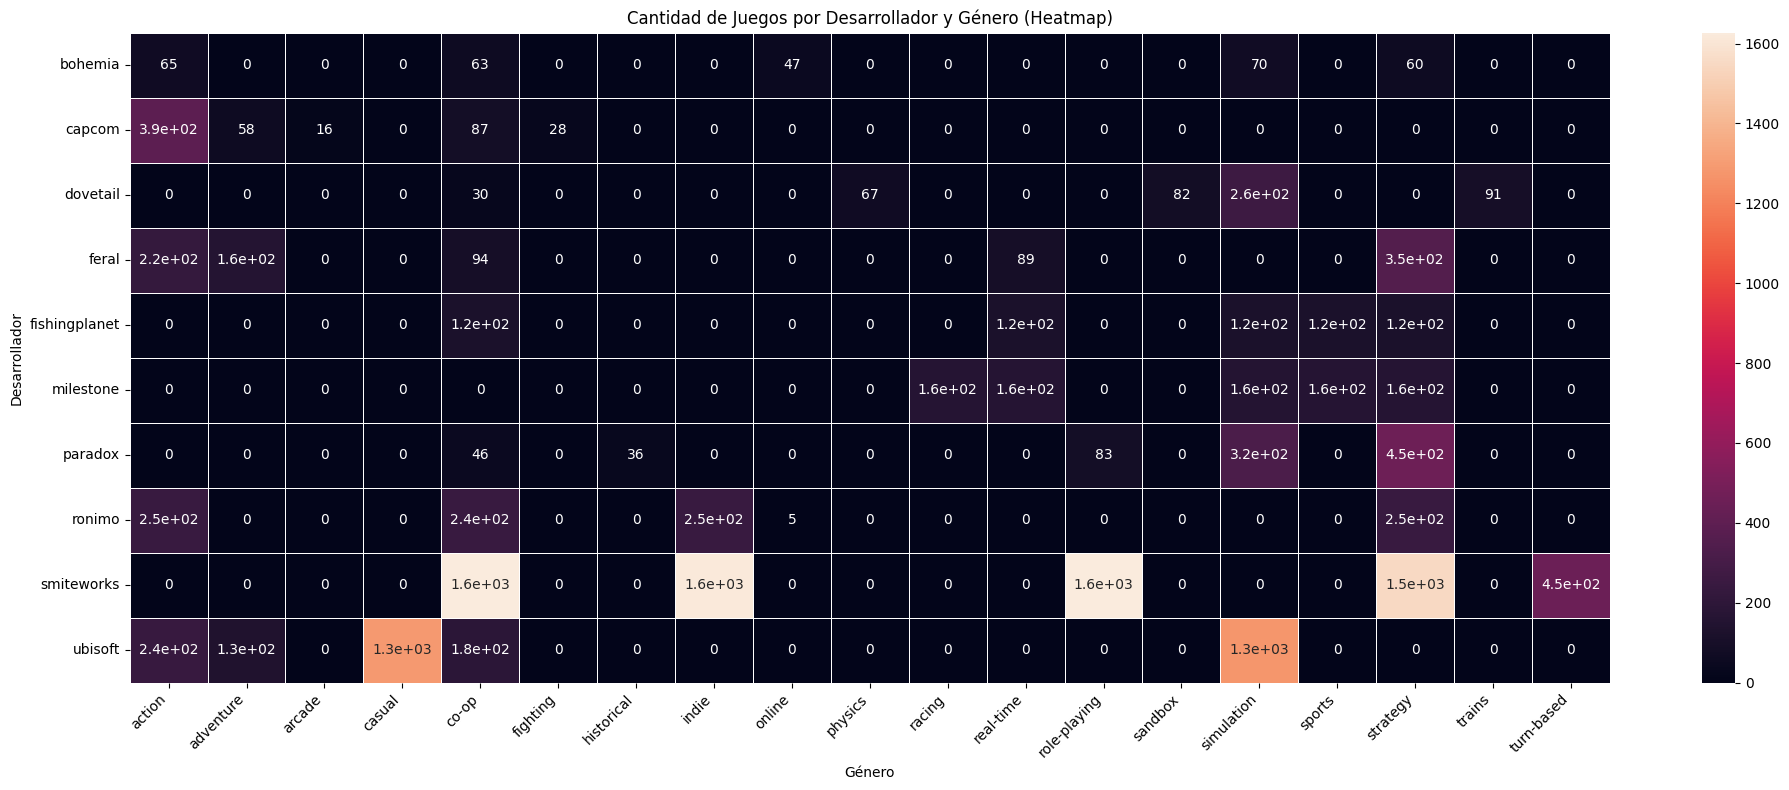

In [143]:
# se realiza un heatmap con el pivot
plt.figure(figsize=(20, 8))
sns.heatmap(top_devs_genres_pivot, annot=True, linewidths=.5)

plt.title('Cantidad de Juegos por Desarrollador y Género (Heatmap)')
plt.ylabel('Desarrollador')
plt.xlabel('Género')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Cantidad de trabajos de los desarrolladores por año

In [144]:
# agrupamos la cantidad de juegos desarrollados por cada desarrollador por año en un df
devs_years = steam_games.groupby(['developer','release_year']).size().reset_index(name='count')
devs_years = devs_years[(devs_years['developer'] != 'none') & (devs_years['developer'].isin(developers['developer'].head(15)))]

devs_years.head(3)

,developer,release_year,count
1131,aspyr,2003.0,92
1132,aspyr,2005.0,35
1133,aspyr,2006.0,10


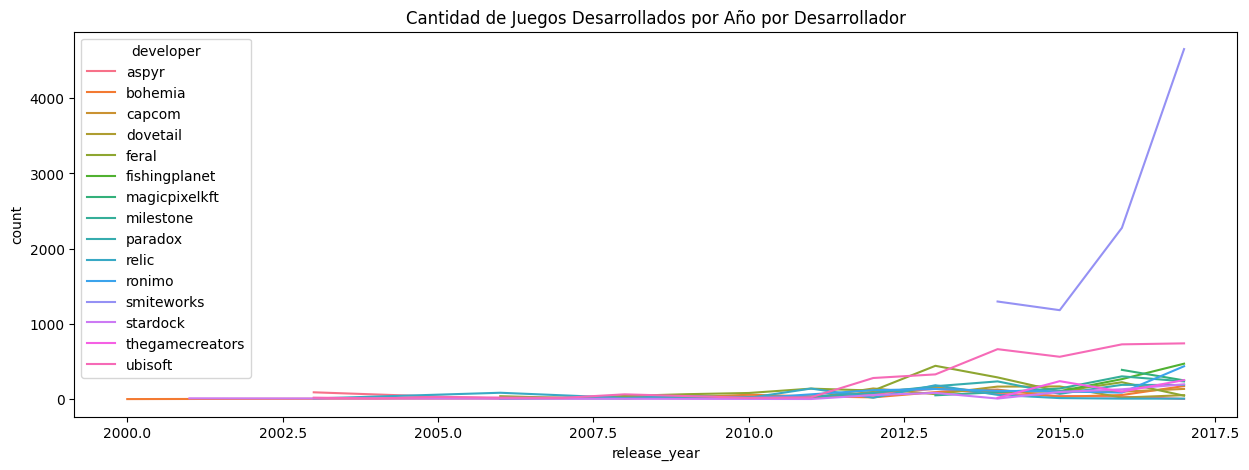

In [145]:
# graficar cantidad de juegos desarrollados por año por los desarrolladores con más proyectos
fig, ax = plt.subplots(figsize=(15, 5))

sns.lineplot(x='release_year', y='count', hue='developer', data=devs_years, ax=ax)

plt.title('Cantidad de Juegos Desarrollados por Año por Desarrollador')
plt.show()

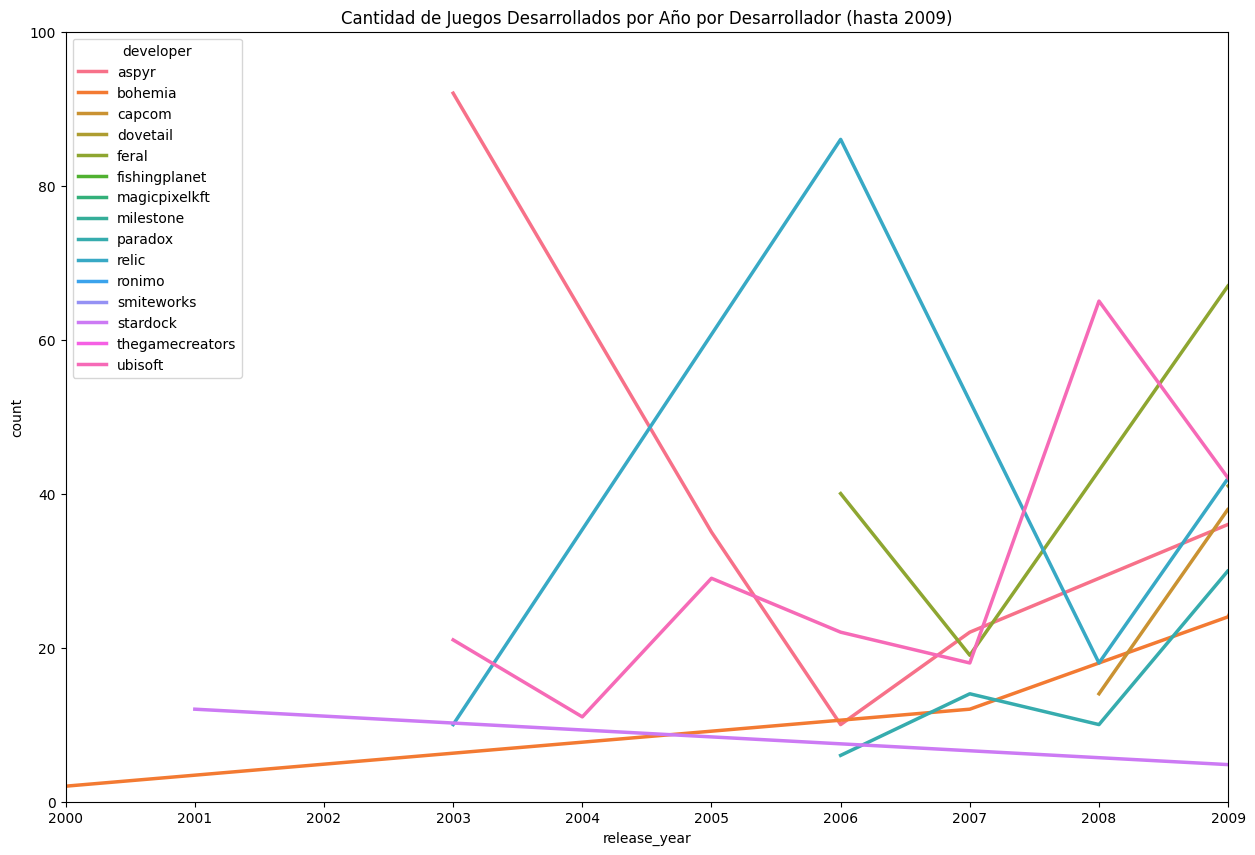

In [166]:
# graficar cantidad de juegos desarrollados por año por los desarrolladores con más proyectos antes del 2009
fig, ax = plt.subplots(figsize=(15, 10))

sns.lineplot(x='release_year', y='count', hue='developer', data=devs_years, ax=ax, linewidth=2.5)
# recortar gráfica para mostrar hasta el año 2009
plt.title('Cantidad de Juegos Desarrollados por Año por Desarrollador (hasta 2009)')
plt.xlim(2000, 2009)
plt.ylim(0, 100)

plt.show()

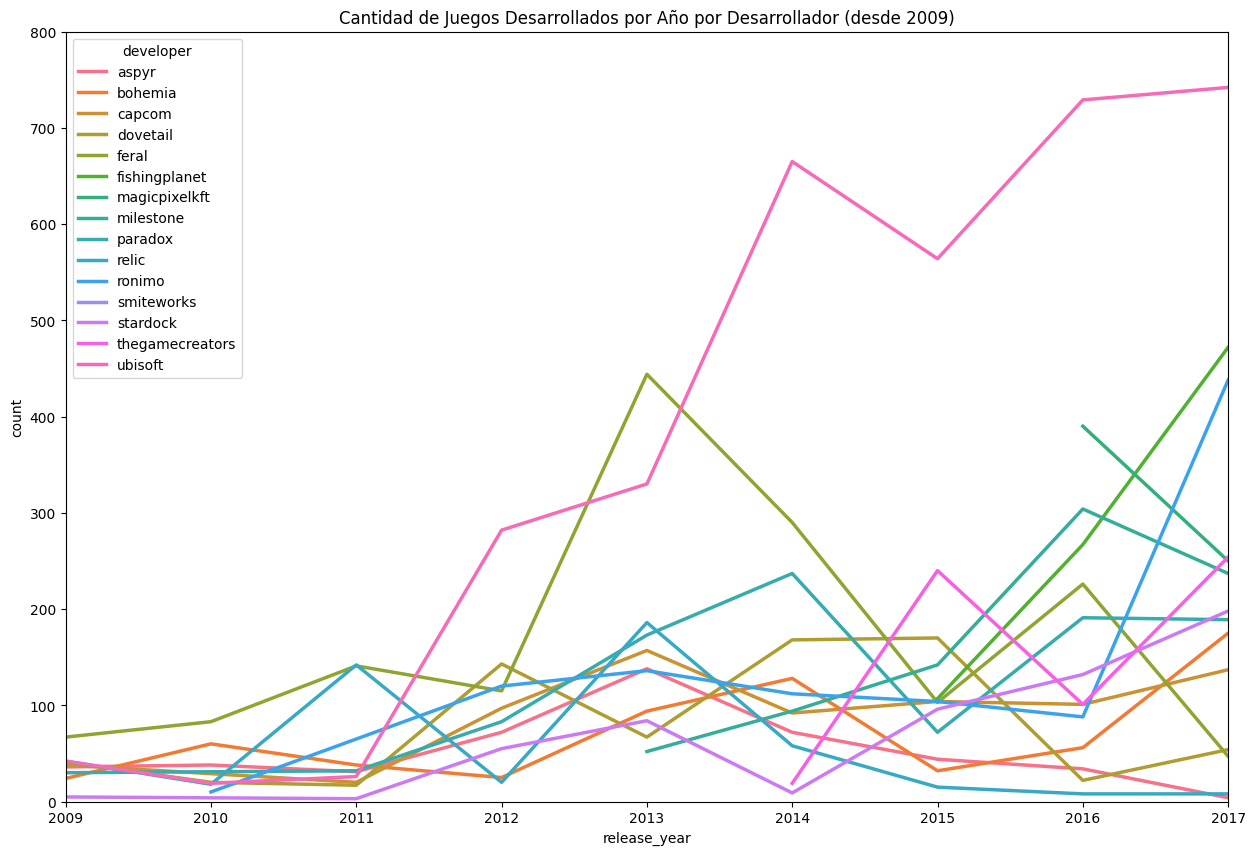

In [146]:
# graficar cantidad de juegos desarrollados por año por los desarrolladores con más proyectos a partir del año 2009
fig, ax = plt.subplots(figsize=(15, 10))

sns.lineplot(x='release_year', y='count', hue='developer', data=devs_years, ax=ax, linewidth=2.5)
# recortar gráfica para mostrar desde el año 2009 en adelante
plt.title('Cantidad de Juegos Desarrollados por Año por Desarrollador (desde 2009)')
plt.xlim(2009, 2017)
plt.ylim(0, 800)

plt.show()

### Géneros más comunes por año

In [150]:
# crear la variable para visualizar los géneros más comunes por año
genres_year = steam_games.groupby(['genres','release_year']).size().reset_index(name='count')
genres_year = genres_year[genres_year['genres'].isin(top_genres['genres'].head(15))]

genres_year.head(3)

,genres,release_year,count
11,action,1970.0,1
12,action,1982.0,1
13,action,1983.0,1


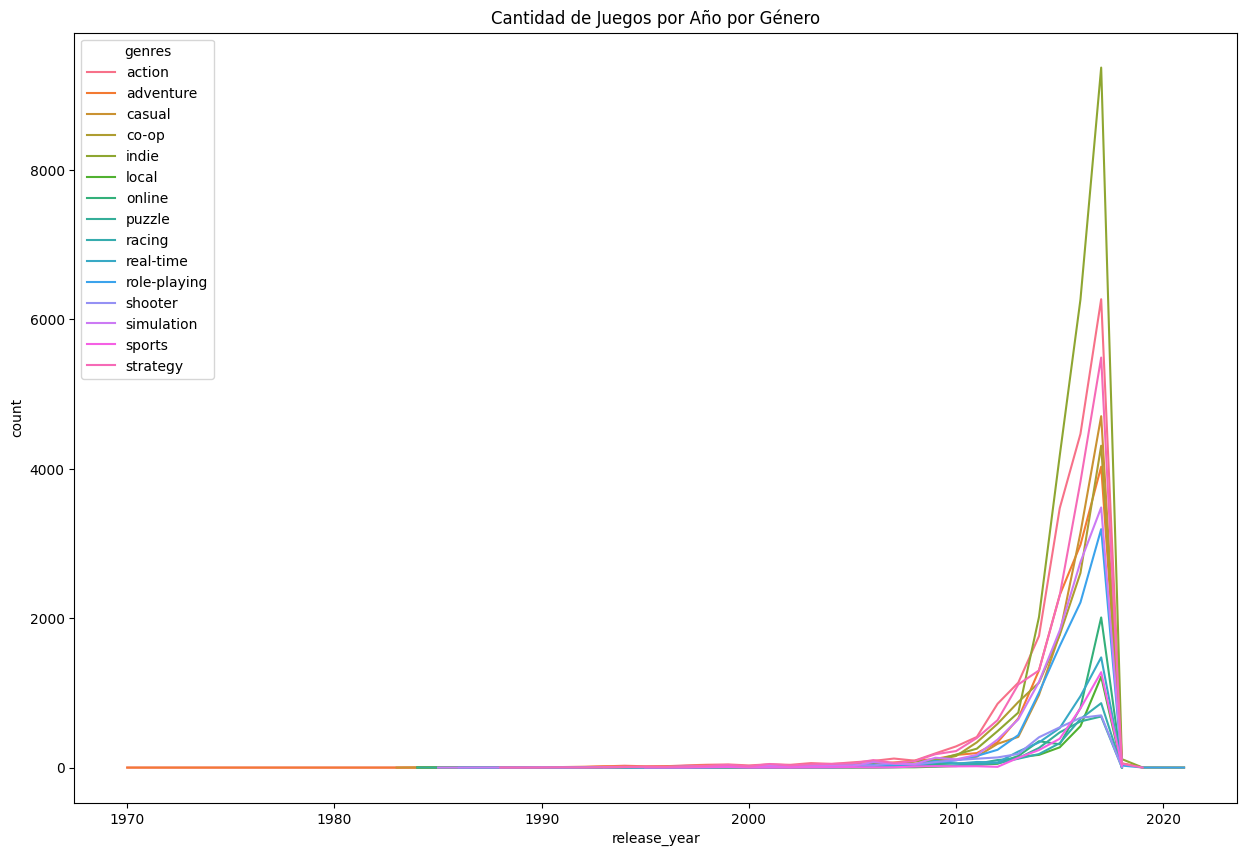

In [155]:
# visualizar los géneros más comunes por año
fig, ax = plt.subplots(figsize=(15, 10))

sns.lineplot(x='release_year', y='count', hue='genres', data=genres_year, ax=ax)

plt.title('Cantidad de Juegos por Año por Género')
plt.show()

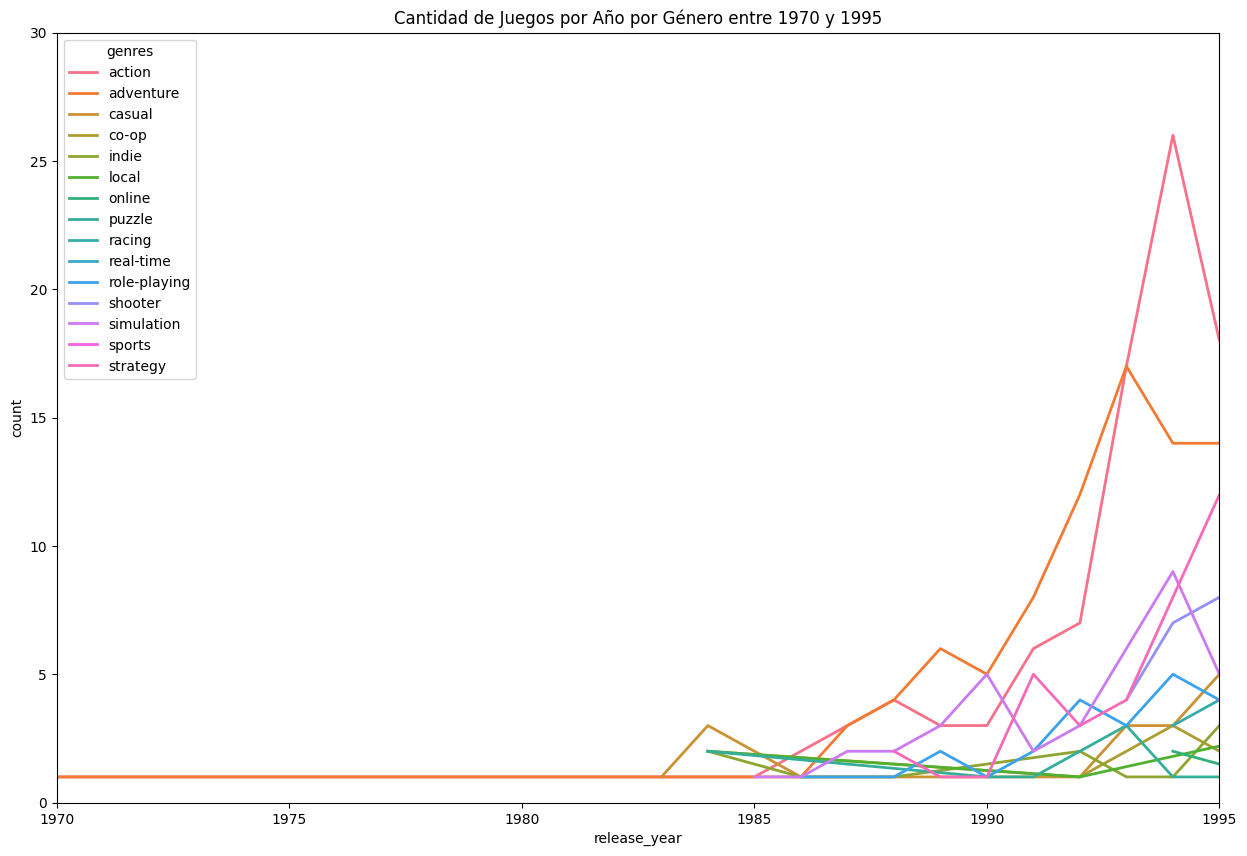

In [162]:
# analizar a más detalle el periodo entre 1970 y 1995
# visualizar los géneros más comunes por año
fig, ax = plt.subplots(figsize=(15, 10))

sns.lineplot(x='release_year', y='count', hue='genres', data=genres_year, ax=ax, linewidth=2)
plt.xlim(1970, 1995)
plt.ylim(0, 30)
plt.title('Cantidad de Juegos por Año por Género entre 1970 y 1995')
plt.show()

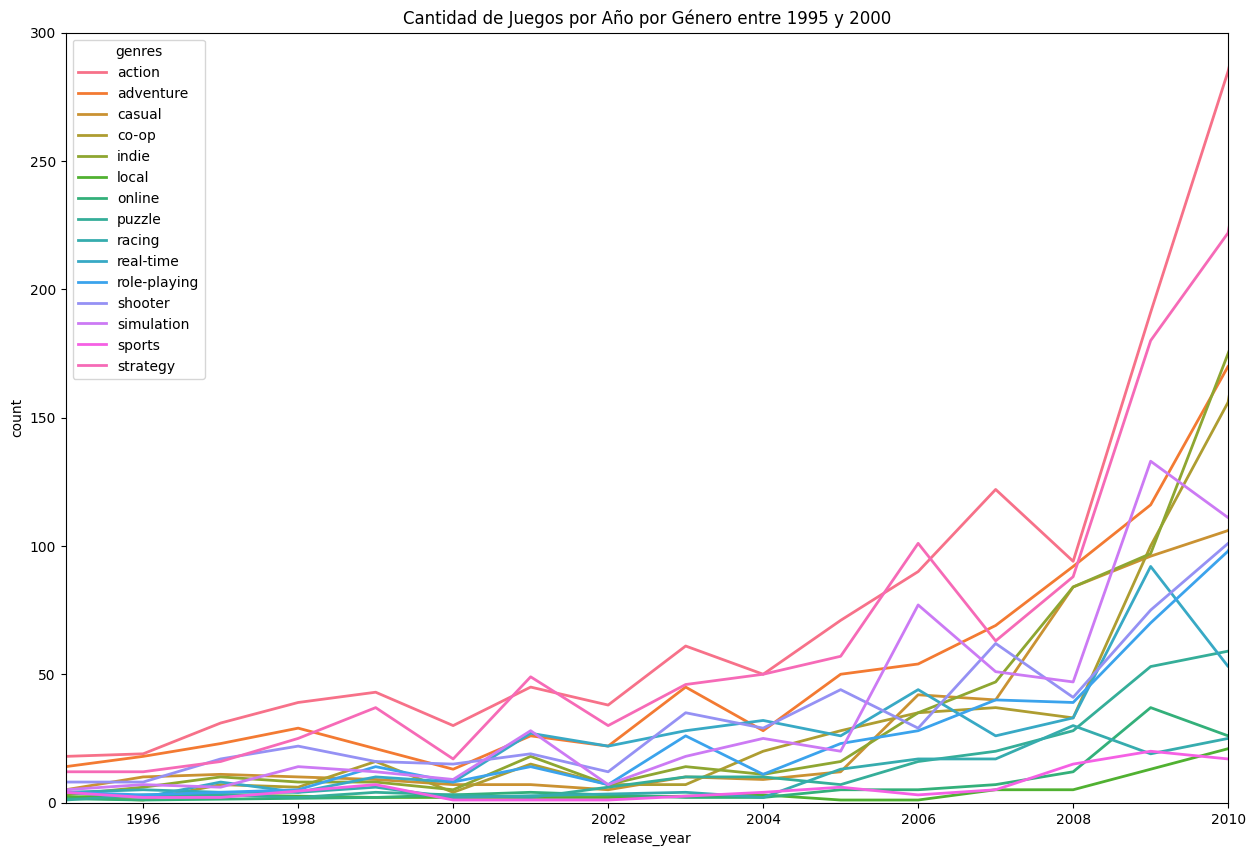

In [177]:
# analizar los géneros más desarrollados desde 1995 al 2010
fig, ax = plt.subplots(figsize=(15, 10))

sns.lineplot(x='release_year', y='count', hue='genres', data=genres_year, ax=ax, linewidth=2)
# recortar gráfica para mostrar desde el año 2009 en adelante
plt.title('Cantidad de Juegos por Año por Género entre 1995 y 2010')
plt.xlim(1995, 2010)
plt.ylim(0, 300)

plt.show()

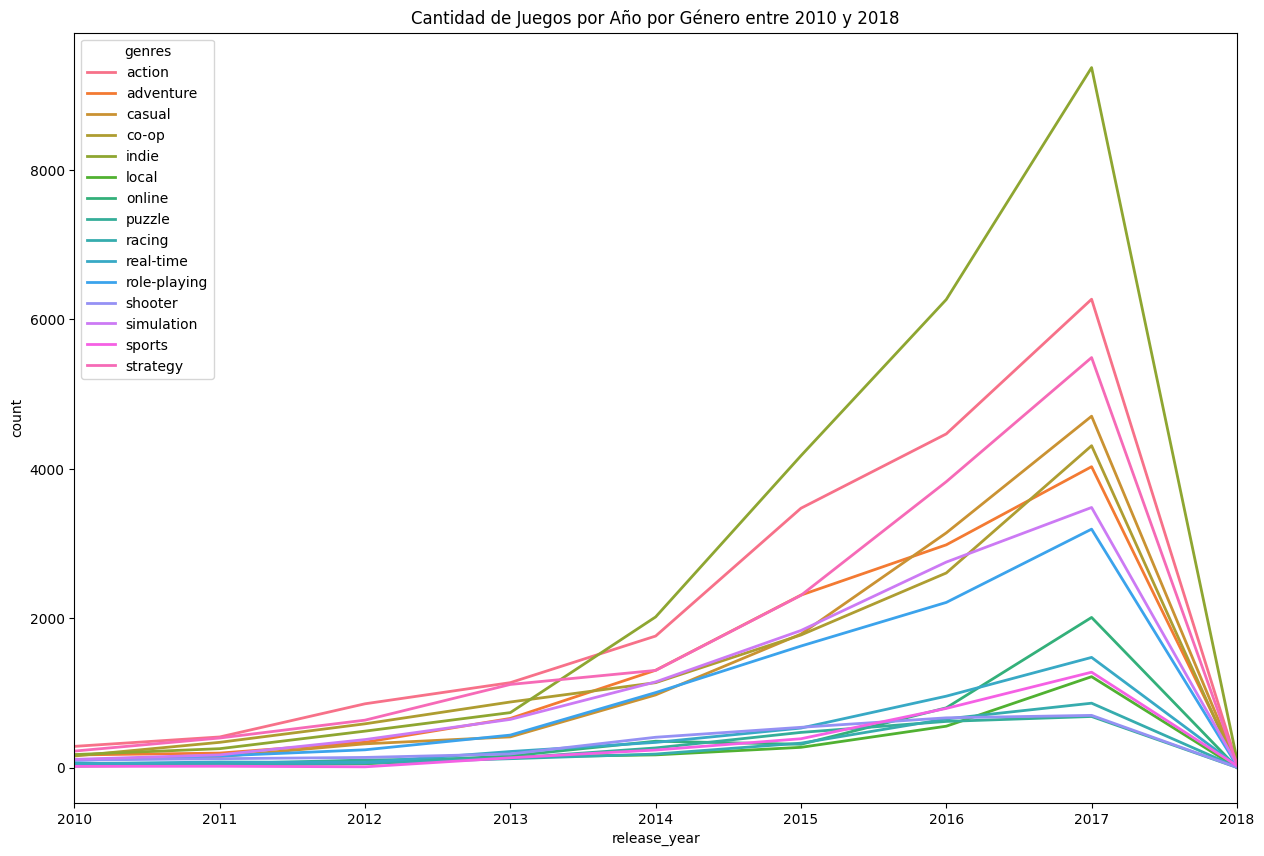

In [179]:
# analizar los géneros más desarrollados desde 2010 al 2018
fig, ax = plt.subplots(figsize=(15, 10))

sns.lineplot(x='release_year', y='count', hue='genres', data=genres_year, ax=ax, linewidth=2)
# recortar gráfica para mostrar desde el año 2009 en adelante
plt.title('Cantidad de Juegos por Año por Género entre 2010 y 2018')
plt.xlim(2010, 2018)

plt.show()

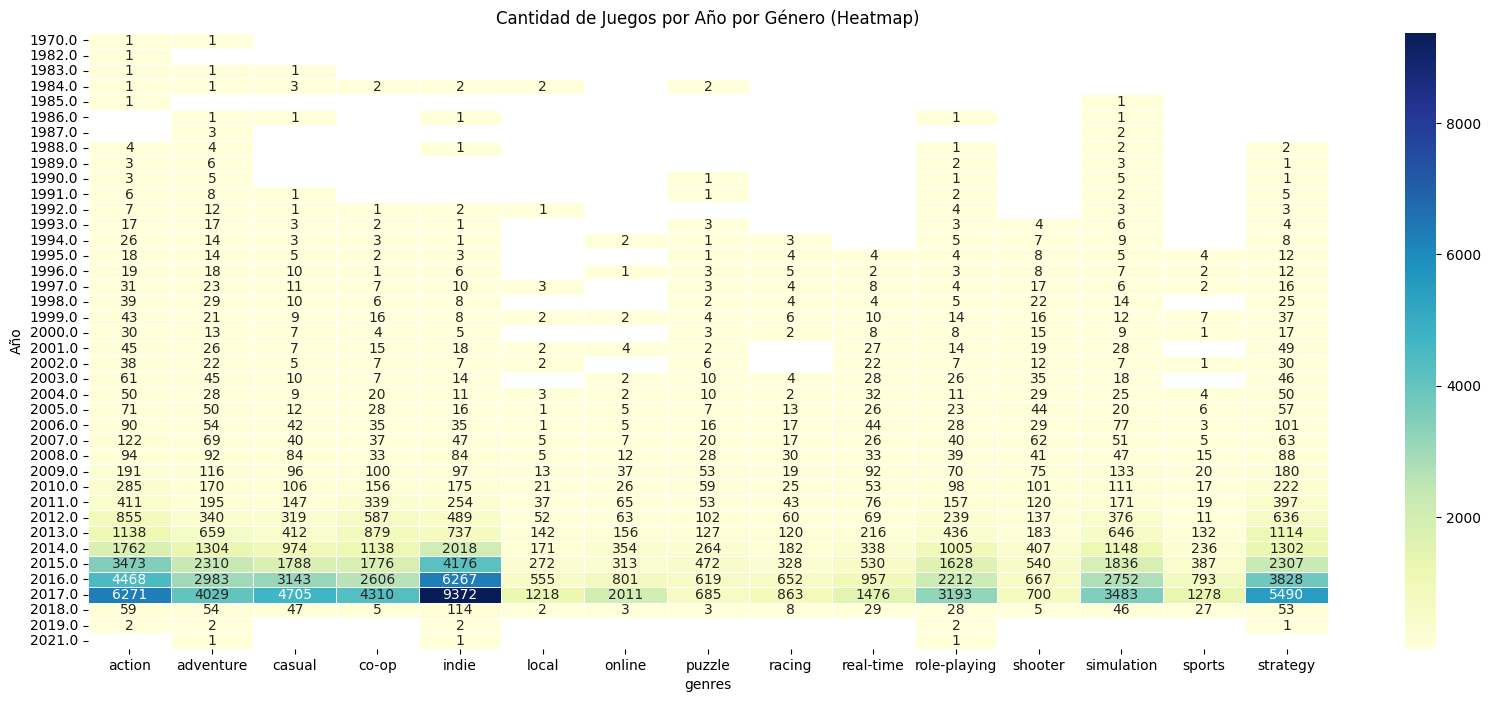

In [181]:
#heatmap de los géneros más comunes por año
fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(genres_year.pivot(index='release_year', columns='genres', values='count'), annot=True, cmap='YlGnBu', fmt='g', linewidths=.5)

plt.title('Cantidad de Juegos por Año por Género (Heatmap)')
plt.ylabel('Año')
plt.show()

### Conclusiones

<b>Conclusión developers: </b> 
- smiteworks comenzó su actividad en 2014 colaborando con empresas en el desarrollo de juegos de géneros mayormente co-op, role-playing, indie, estrategia y (en menor medida) turn-based.
- ubisoft tiene más historia habiendo desarrollado mayormente juegos de géneros casual y sumulación, algunos de acción y, en menor medida pero no menos importante, co-op y aventura.

<b>Conclusión genres: </b> 
- según los registros, en el '84 hubo un leve incremento en el desarrollo de juegos casuales y comenzaron a registrarse juegos con los géneros local e indie, pero el verdadero comienzo en el desarrollo de más juegos registrados comienza a partir de 1985.
- se ve un gran incremento en el desarrollo de los géneros acción, aventura, casual, co-op, indie y strategy a partir del año 2015 y de role-playing y simulación a partir del 2016, y la mayor producción de juegos puede verse en el año 2017 en múltiples categorías teniendo un gran aumento el desarrollo de juegos indie, seguido por los géneros de acción, stretegy, casual y co-op.